# Notebook pour explorer la librairie ALBUMENTATION

Albumentation est une biblithèque Python qui permet d'augmenter le nombre d'image d'un dataset en réalisant des transformations. Il ne s'agit pas de couvrir toutes les transformations possible mais juste d'évaluer le fonctionnement de la bib. 

https://albumentations.ai/docs/


- Auteur : G. Sainton
- Date : 11/2023
- Version 1.0

In [1]:
import sys, os
import numpy as np

#check if the albumentation library is installed
# if not, install it
try:
    import albumentations as A
except:
    print('Albumentation library not found. Please install it.')
    %pip install albumentations 
    


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


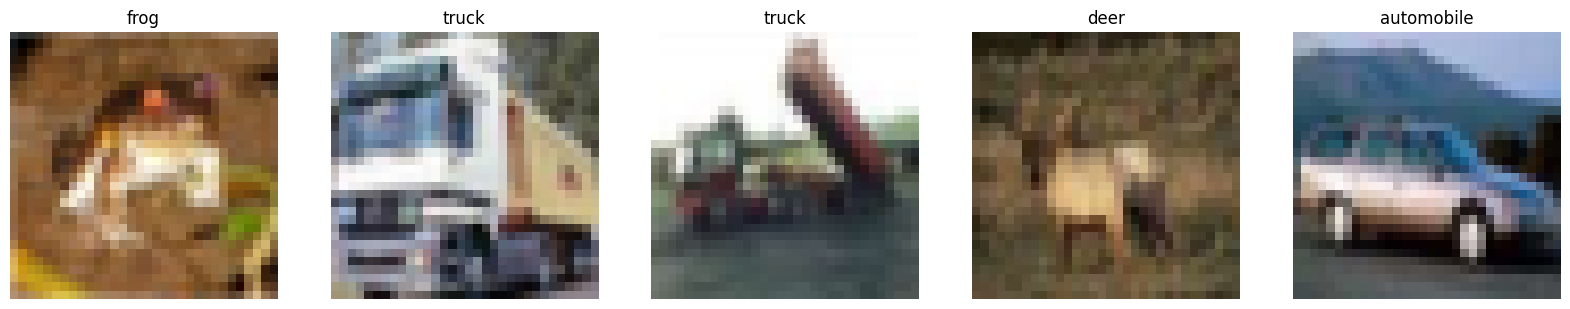

In [6]:
# import keras dataset and albumentation library
from keras.datasets import cifar10
import albumentations as A
import matplotlib.pyplot as plt

# load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Shapes of the differents sets
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


# function to plot 5 images from the dataset
def plot_images(x_train, labels):
    fig, ax = plt.subplots(1, 5, figsize=(20, 10))
    for i in range(5):
        ax[i].imshow(x_train[i])
        ax[i].set_title(labels[y_train[i][0]])
        ax[i].axis('off')
    plt.show()

# plot a random set of images from the dataset cifar10
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plot_images(x_train, labels)



/Users/greg/miniconda3/lib/python3.10/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


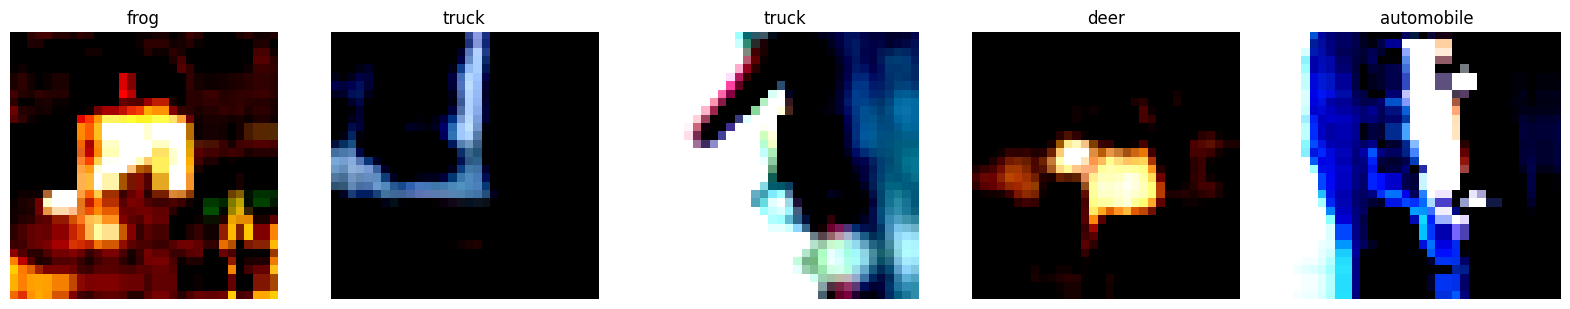

In [7]:
# Function using albumentation au augment the dataset
def augment_dataset(x_train, y_train, x_test, y_test):
    
    # define the transformations
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.RandomRotate90(p=0.5),
        A.Transpose(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
        A.Blur(blur_limit=3, p=0.2),
        A.OpticalDistortion(p=0.3),
        A.GridDistortion(p=0.1),
        A.HueSaturationValue(p=0.3),
        A.CLAHE(p=0.2),
        A.ToGray(p=0.1),
        A.Cutout(num_holes=1, max_h_size=8, max_w_size=8, p=0.5),
        A.Normalize()
    ])
    
    # apply the transformations to the train set
    x_train_aug = np.array([transform(image=x)['image'] for x in x_train])
    
    # apply the transformations to the test set
    x_test_aug = np.array([transform(image=x)['image'] for x in x_test])
    
    # return the augmented dataset
    return x_train_aug, y_train, x_test_aug, y_test

# Compare the original dataset with the augmented one
x_train_aug, y_train, x_test_aug, y_test = augment_dataset(x_train, y_train, x_test, y_test)
plot_images(x_train_aug, labels)


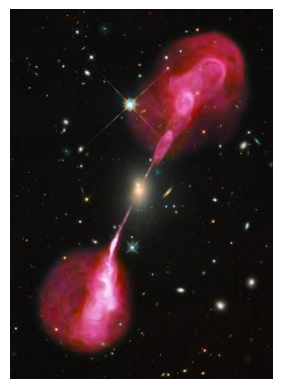

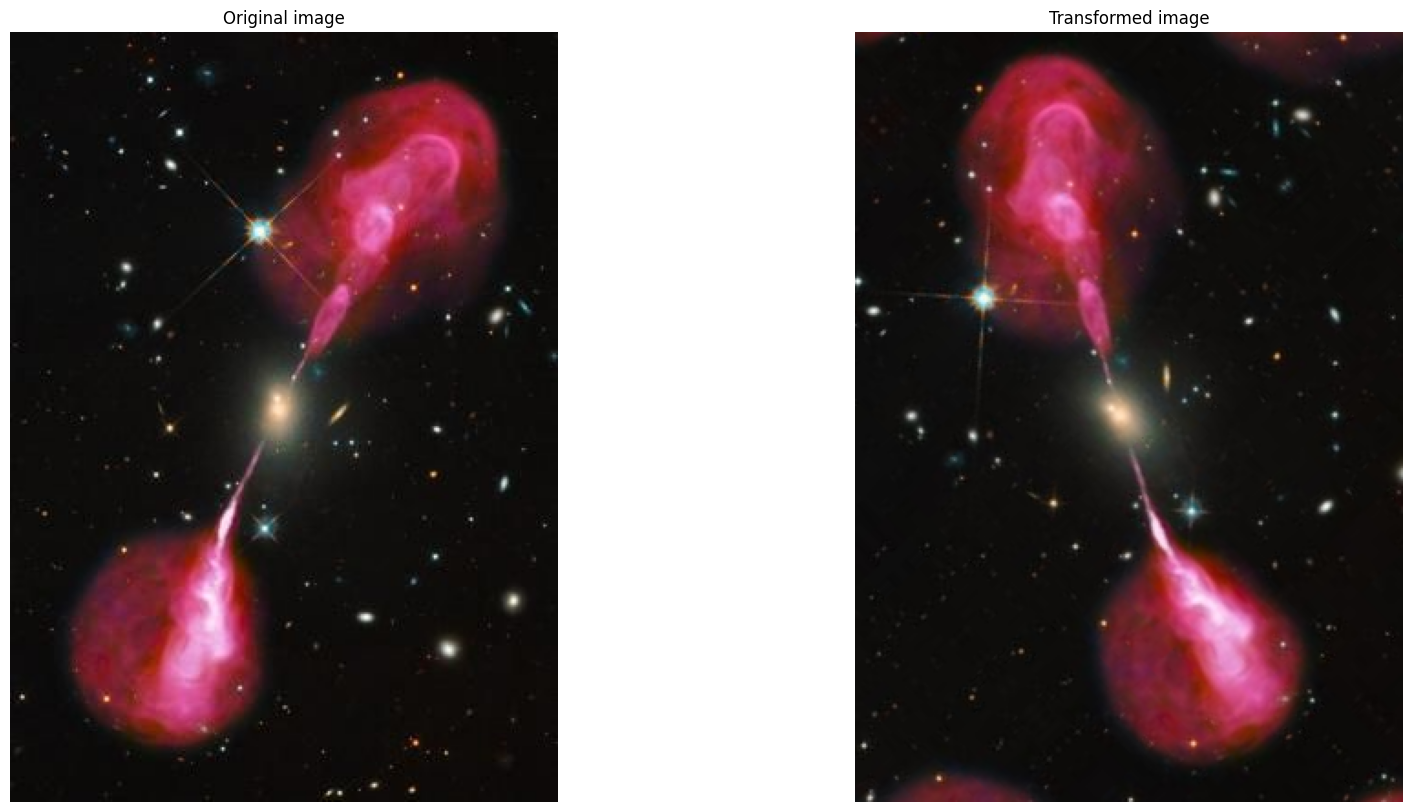

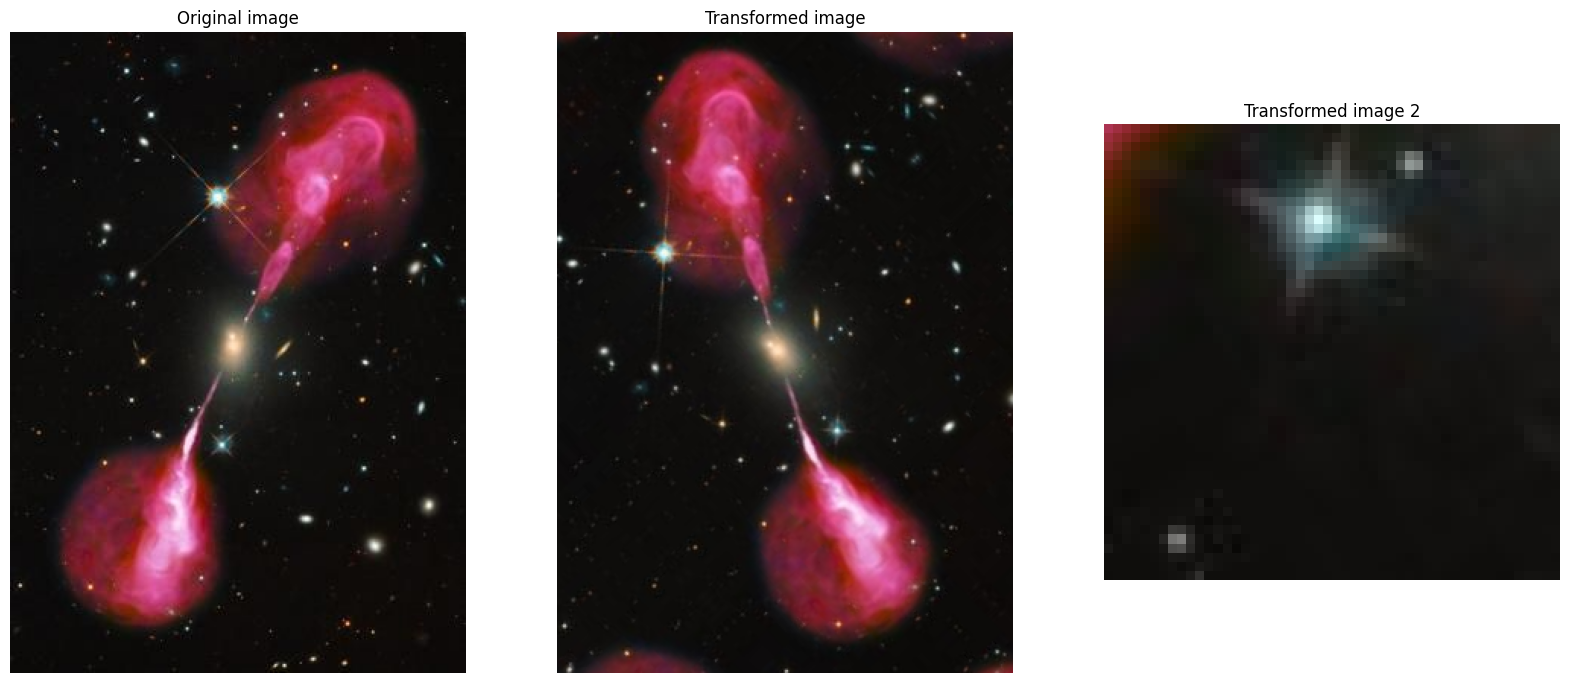

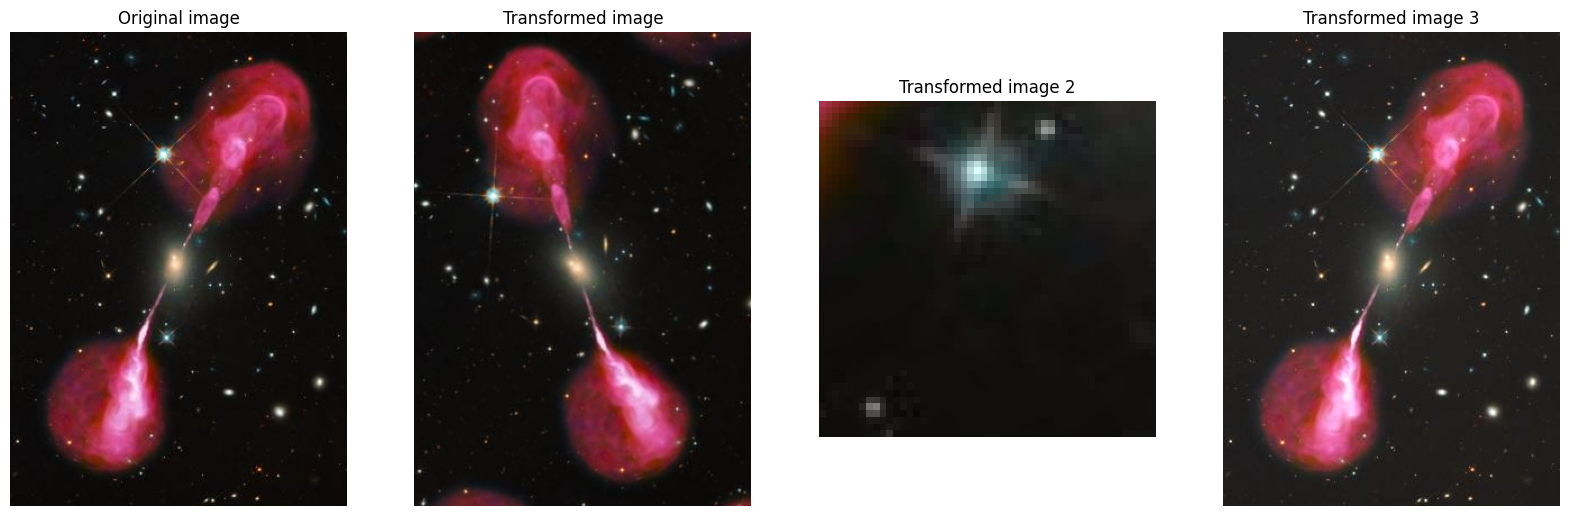

In [12]:
#Open the hercule_galaxy.jpg image in images directory with CV2
import cv2
img = cv2.imread('images/hercule_galaxy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# remove the axis
plt.axis('off')
plt.imshow(img)
plt.show()

# define a transformation with a rotation of 90 degrees
transform = A.Compose([
    A.Rotate(limit=90, p=1)
])

# apply the transformation to the image
img_transformed = transform(image=img)['image']

# plot the original and the transformed image in a suplot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(img_transformed)
ax[1].set_title('Transformed image')
ax[1].axis('off')
plt.show()

#define another transformation with a random rotation and a crop of 50% of the image
transform_2 = A.Compose([
    A.Rotate(limit=90, p=1),
    A.RandomCrop(height=50, width=50, p=1)
])
# apply the transformation to the image
img_transformed_2 = transform_2(image=img)['image']

# plot the original and the transformed images in a suplot
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(img_transformed)
ax[1].set_title('Transformed image')
ax[1].axis('off')
ax[2].imshow(img_transformed_2)
ax[2].set_title('Transformed image 2')
ax[2].axis('off')
plt.show()

# define a transformation with a random brightness and contrast
transform_3 = A.Compose([
    A.RandomBrightnessContrast(p=1)
])
# apply the transformation to the image
img_transformed_3 = transform_3(image=img)['image']

# plot the original and the transformed images in a suplot
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(img_transformed)
ax[1].set_title('Transformed image')
ax[1].axis('off')
ax[2].imshow(img_transformed_2)
ax[2].set_title('Transformed image 2')
ax[2].axis('off')
ax[3].imshow(img_transformed_3)
ax[3].set_title('Transformed image 3')
ax[3].axis('off')
plt.show()
